In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential, models
import pathlib

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/datasets/PLD_3_Classes_256/Training",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/datasets/PLD_3_Classes_256/Testing",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/datasets/PLD_3_Classes_256/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [6]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [7]:
len(training_dataset)

102

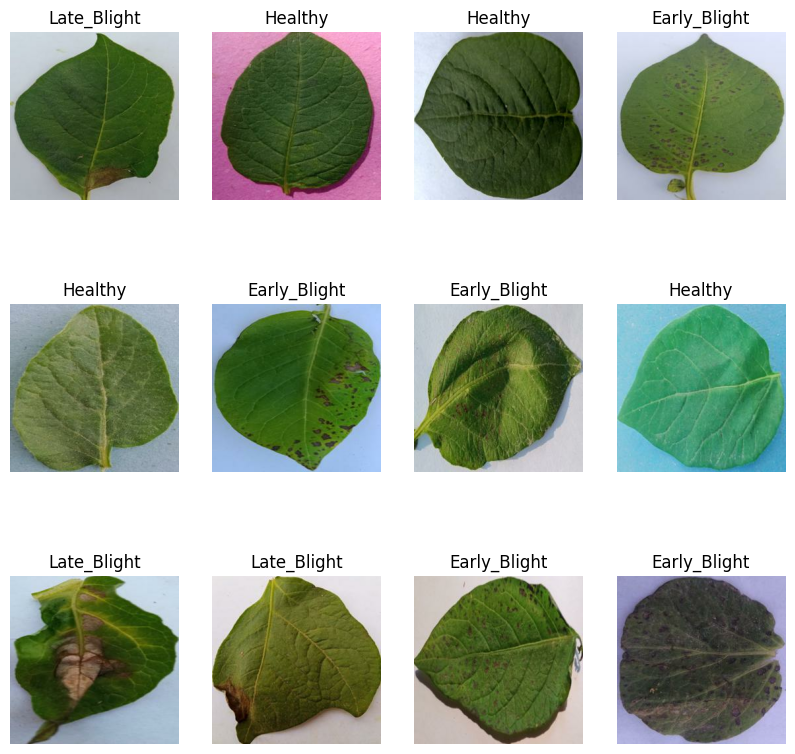

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#model start

In [9]:
resize_and_rescale= tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)])

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [11]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
model.fit(
    training_dataset,
    epochs=15,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)

Epoch 1/15
102/102 [==============================] - 618s 6s/step - loss: 1.0154 - accuracy: 0.4509 - val_loss: 0.8749 - val_accuracy: 0.6803
Epoch 2/15
102/102 [==============================] - 510s 5s/step - loss: 0.7684 - accuracy: 0.7139 - val_loss: 0.7093 - val_accuracy: 0.7764
Epoch 3/15
102/102 [==============================] - 504s 5s/step - loss: 0.5911 - accuracy: 0.7622 - val_loss: 0.6981 - val_accuracy: 0.7572
Epoch 4/15
102/102 [==============================] - 502s 5s/step - loss: 0.4007 - accuracy: 0.8468 - val_loss: 0.3235 - val_accuracy: 0.8606
Epoch 5/15
102/102 [==============================] - 505s 5s/step - loss: 0.3138 - accuracy: 0.8890 - val_loss: 0.2242 - val_accuracy: 0.9062
Epoch 6/15
102/102 [==============================] - 520s 5s/step - loss: 0.2202 - accuracy: 0.9213 - val_loss: 0.2289 - val_accuracy: 0.9231
Epoch 7/15
102/102 [==============================] - 497s 5s/step - loss: 0.1751 - accuracy: 0.9385 - val_loss: 0.1645 - val_accuracy: 0.9423

The Image Title :  Early_Blight
1/1 [==============================] - 1s 1s/step
Model Predicted label :  Early_Blight


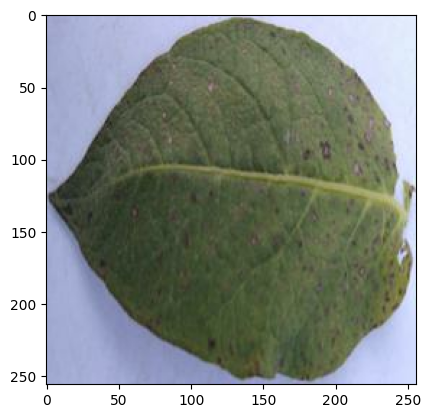

In [15]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])